In [197]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [198]:
df = pd.read_csv("df_arabica_clean (1).csv")
data = df.copy()
data.head(2)
data.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [199]:
data = data[['Country of Origin', 'Altitude', 'Region',
       'Variety', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Overall',
       'Moisture Percentage', 'Category Two Defects',
       'Quakers', 'Color']]
# print(data.shape)
# data.nunique()
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Moisture Percentage,Category Two Defects,Quakers
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,7.676812,10.735266,2.251208,0.690821
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.306359,1.247468,2.950183,1.686918
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,6.670000,0.000000,0.000000,0.000000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,7.500000,10.100000,0.000000,0.000000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,7.670000,10.800000,1.000000,0.000000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,7.920000,11.500000,3.000000,1.000000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,8.580000,13.500000,16.000000,12.000000


In [200]:
data['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

In [201]:
Country_of_Origin_Dict = dict(zip(pd.Series(data['Country of Origin'].unique()),pd.Series([i for i in range(data['Country of Origin'].nunique())]) ))
Altitude_Dict = dict(zip(pd.Series(data['Altitude'].unique()),pd.Series([i for i in range(data['Altitude'].nunique())]) ))
Region_Dict = dict(zip(pd.Series(data['Region'].unique()),pd.Series([i for i in range(data['Region'].nunique())]) ))
Variety_Dict = dict(zip(pd.Series(data['Variety'].unique()),pd.Series([i for i in range(data['Variety'].nunique())]) ))
Processing_Method_Dict = dict(zip(pd.Series(data['Processing Method'].unique()),pd.Series([i for i in range(data['Processing Method'].nunique())]) ))
Color_Dict = dict(zip(pd.Series(data['Color'].unique()),pd.Series([i for i in range(data['Color'].nunique())]) ))


data['Country of Origin Label'] = data['Country of Origin'].map(Country_of_Origin_Dict)
data['Altitude Label']=data['Altitude'].map(Altitude_Dict)
data['Region Label'] =data['Region'].map(Region_Dict)
data['Variety Label']=data['Variety'].map(Variety_Dict)
data['Processing Method Label']=data['Processing Method'].map(Processing_Method_Dict)
data['Color Label']= data['Color'].map(Color_Dict)


data.drop(['Country of Origin','Altitude','Region','Variety','Processing Method','Color'], axis =1 ,inplace = True)

In [202]:
data.isna().sum()

Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Overall                    0
Moisture Percentage        0
Category Two Defects       0
Quakers                    0
Country of Origin Label    0
Altitude Label             1
Region Label               1
Variety Label              1
Processing Method Label    1
Color Label                0
dtype: int64

In [203]:
data.dropna(inplace = True)

In [204]:
data.isna().sum()

Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Overall                    0
Moisture Percentage        0
Category Two Defects       0
Quakers                    0
Country of Origin Label    0
Altitude Label             0
Region Label               0
Variety Label              0
Processing Method Label    0
Color Label                0
dtype: int64

In [205]:
X = df.drop(['Category Two Defects'], axis =1)
y = df['Category Two Defects']

In [206]:
y.value_counts()

Category Two Defects
0     74
2     37
1     34
3     16
5     13
4     13
7      5
8      4
12     3
11     3
9      2
16     1
10     1
13     1
Name: count, dtype: int64

In [207]:
data_new =data[(data['Category Two Defects']!=16)&(data['Category Two Defects']!=10)&(data['Category Two Defects']!=13)]

X = data_new.drop(['Category Two Defects'], axis =1)
y = data_new['Category Two Defects']

y.value_counts()

Category Two Defects
0     74
2     36
1     33
3     16
5     13
4     13
7      5
8      4
12     3
11     3
9      2
Name: count, dtype: int64

In [208]:
smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)
X_sm , y_sm = smote.fit_resample(X,y)
y_sm.value_counts() 
for i in range(9):
    smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)
    X_sm , y_sm = smote.fit_resample(X_sm,y_sm)
y_sm.value_counts()

Category Two Defects
3     74
0     74
2     74
1     74
5     74
4     74
9     74
7     74
12    74
11    74
8     74
Name: count, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train ,y_test = train_test_split(X_sm, y_sm , test_size=0.2, random_state=23)

In [210]:
model = RandomForestClassifier(n_estimators=150, random_state=23)

model.fit(X_train , y_train)

model.score(X_test , y_test)

0.901840490797546

In [212]:
predictions = model.predict(X_test)

In [213]:
predictions

array([ 3,  1,  7,  3,  5, 11,  7,  2,  8,  1,  2, 11,  2,  5,  0,  2,  9,
        2,  4,  1,  5,  9,  7,  9,  8,  7,  2,  2,  5, 11,  1, 11, 12,  3,
       12,  3,  5,  2, 12,  4,  8,  5,  3,  2,  2,  0,  8,  1, 11,  2,  4,
        2, 11,  9,  2,  0,  4,  5,  0, 12, 12,  8,  4, 11,  8,  1,  4,  8,
        0,  1,  5,  0,  1,  0,  9,  2,  8,  1,  7,  4,  9,  1, 11,  3,  5,
        9,  5, 12,  2, 11, 11,  7,  3,  9,  4, 11,  7,  8,  7,  9,  9,  7,
        9,  0, 12,  0,  4,  9,  7,  8,  1, 12,  3,  0,  3, 12,  1,  2,  9,
        3,  5,  7,  2,  0,  8,  1,  9,  5,  3, 12,  9,  5,  7,  5,  2,  0,
        1,  8,  1,  1,  5,  5,  1,  3,  2,  2,  5, 12,  8,  8,  3,  0,  1,
        5,  3,  8,  1,  4,  7, 11,  4,  7,  8])

In [214]:
print("\n\n Classification Report    : \n\n", classification_report(y_test,predictions))



 Classification Report    : 

               precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.95      0.95      0.95        19
           2       0.60      0.75      0.67        16
           3       0.93      0.81      0.87        16
           4       1.00      0.79      0.88        14
           5       0.94      0.89      0.92        19
           7       1.00      1.00      1.00        14
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        11

    accuracy                           0.90       163
   macro avg       0.91      0.90      0.91       163
weighted avg       0.91      0.90      0.90       163



In [215]:
print("Accuracy of Model::", model.score(X_test, y_test))

Accuracy of Model:: 0.901840490797546


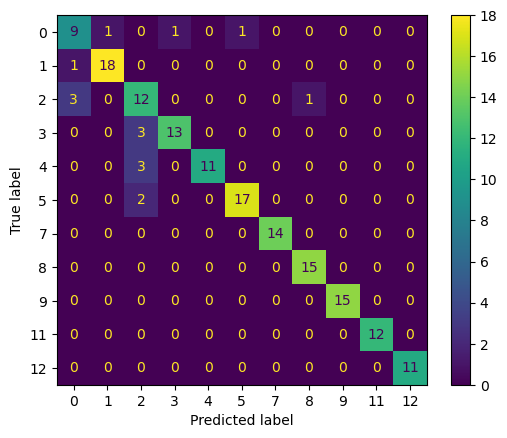

In [216]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)

cm_obj = ConfusionMatrixDisplay(cm, display_labels=['0','1','2','3','4','5','7','8','9','11','12'])

cm_obj.plot()